In [14]:
import pandas as pd
from matplotlib import pyplot as plt
import os
from upsetplot import UpSet
import matplotlib.pyplot as plt
from upsetplot import from_contents

In [15]:
results = {}
files_analyze_order = ["data/report.tsv","data/report_phospho.tsv","data/report_phospho_butyryl.tsv","data/report_phospho_butyryl_acetyl.tsv"]
for f in files_analyze_order:
    if not f.endswith(".tsv"):
        continue
    results[f] = pd.read_csv(f,sep="\t")
    results[f] = results[f][results[f]["Q.Value"] <= 0.01]

In [16]:
# DIA-NN has issues with I/L assignment, as it does not provide both options, so set to "L" for now
unique_mod_seq = {}
for k,v in results.items():
    unique_mod_seq[k] = set(results[k]["Modified.Sequence"])
    unique_mod_seq[k] = set([v.replace("I","L") for v in unique_mod_seq[k]])
    print(k,len(unique_mod_seq[k]))
    print(list(unique_mod_seq[k])[0:5])
    

data/report.tsv 67108
['GGASLLQC(UniMod:4)HLLNDK', 'HPSVNENFC(UniMod:4)NEK', 'ELTENLM(UniMod:35)ATGDLDQDGR', 'EGETVEPYK', 'TPEYLHLDQR']
data/report_phospho.tsv 66498
['ELTENLM(UniMod:35)ATGDLDQDGR', 'HPSVNENFC(UniMod:4)NEK', 'EGETVEPYK', 'TPEYLHLDQR', 'LLQGRPPLDFYPPGVHPSGLVPR']
data/report_phospho_butyryl.tsv 64918
['ELTENLM(UniMod:35)ATGDLDQDGR', 'HPSVNENFC(UniMod:4)NEK', 'EGETVEPYK', 'TPEYLHLDQR', 'LLQGRPPLDFYPPGVHPSGLVPR']
data/report_phospho_butyryl_acetyl.tsv 64266
['ELTENLM(UniMod:35)ATGDLDQDGR', 'HPSVNENFC(UniMod:4)NEK', 'EGETVEPYK', 'TPEYLHLDQR', 'LLQGRPPLDFYPPGVHPSGLVPR']


C:\Users\robbi\anaconda3\envs\py310_deeplc\lib\site-packages\upsetplot\data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
C:\Users\robbi\anaconda3\envs\py310_deeplc\lib\site-packages\upsetplot\plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth

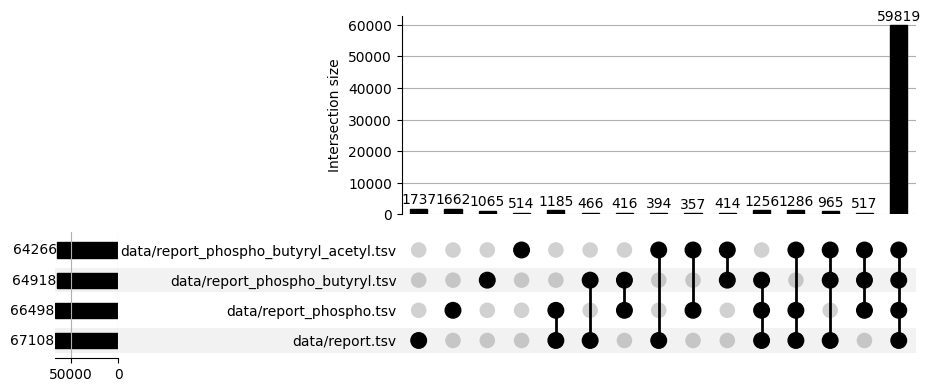

In [17]:
upset_data = from_contents(unique_mod_seq)

upset = UpSet(upset_data, show_counts=True)
upset.plot()
#plt.tight_layout()
plt.savefig("img/upset_diannresults.png")
plt.show()

In [18]:
unique_phos_but = unique_mod_seq[list(unique_mod_seq.keys())[3]].difference(unique_mod_seq[list(unique_mod_seq.keys())[0]])
unique_non = unique_mod_seq[list(unique_mod_seq.keys())[0]].difference(unique_mod_seq[list(unique_mod_seq.keys())[3]])

In [19]:
unique_phos_but_df = results[files_analyze_order[3]][results[files_analyze_order[3]]["Modified.Sequence"].isin(unique_phos_but)].sort_values("Q.Value")
unique_phos_but_df_mask = unique_phos_but_df["Modified.Sequence"].str.contains("UniMod:21") | unique_phos_but_df["Modified.Sequence"].str.contains("UniMod:1289") | unique_phos_but_df["Modified.Sequence"].str.contains("K(UniMod:1)")
unique_non_df = results[files_analyze_order[0]][results[files_analyze_order[0]]["Modified.Sequence"].isin(unique_non)].sort_values("Q.Value")

C:\Users\robbi\AppData\Local\Temp\ipykernel_28976\2514559655.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  unique_phos_but_df_mask = unique_phos_but_df["Modified.Sequence"].str.contains("UniMod:21") | unique_phos_but_df["Modified.Sequence"].str.contains("UniMod:1289") | unique_phos_but_df["Modified.Sequence"].str.contains("K(UniMod:1)")


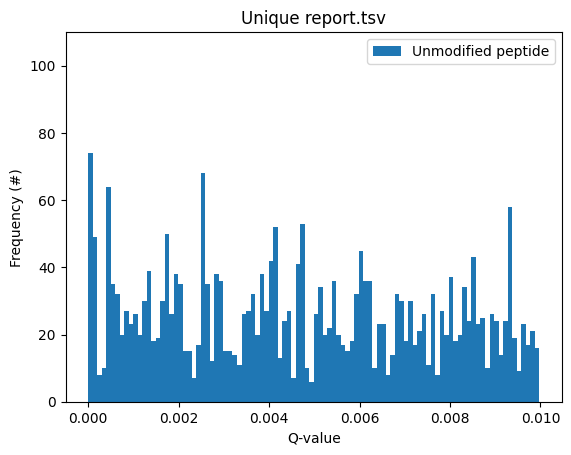

In [20]:
plt.hist(unique_non_df["Q.Value"],bins=100,label="Unmodified peptide")
plt.title("Unique report.tsv")
plt.xlabel("Q-value")
plt.ylabel("Frequency (#)")
plt.ylim(0,110)
plt.legend()
plt.savefig("img/report_plot.png")
plt.show()

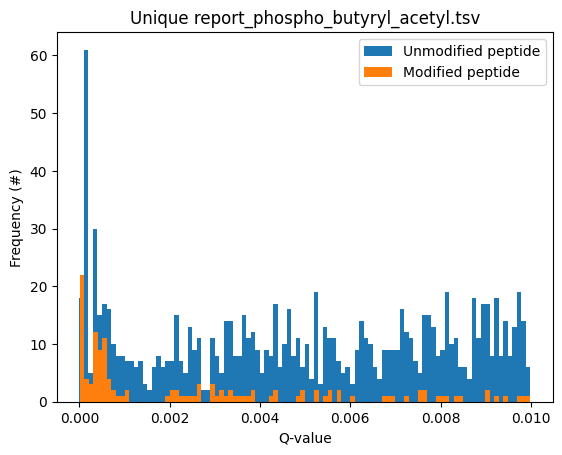

In [21]:
plt.hist(unique_phos_but_df["Q.Value"],bins=100,label="Unmodified peptide")
plt.hist(unique_phos_but_df["Q.Value"][unique_phos_but_df_mask],bins=100,label="Modified peptide")
plt.title("Unique report_phospho_butyryl_acetyl.tsv")
plt.xlabel("Q-value")
plt.ylabel("Frequency (#)")
plt.legend()
plt.savefig("img/report_mod_plot.png")
plt.show()